In [109]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("C:\\Users\\lsj02\\OneDrive\\바탕 화면\\PNU\\멘토링\\Study\\seojin\\bigdatacertificationkr\\diabetes.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Outcome')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 9), (154, 9), (614, 2), (154, 2))

In [110]:
import pandas as pd

df = pd.concat([X_train, X_test])
df.drop(['id'], axis=1)
df

X_train = df[:len(X_train)]
X_test = df[len(X_train):]

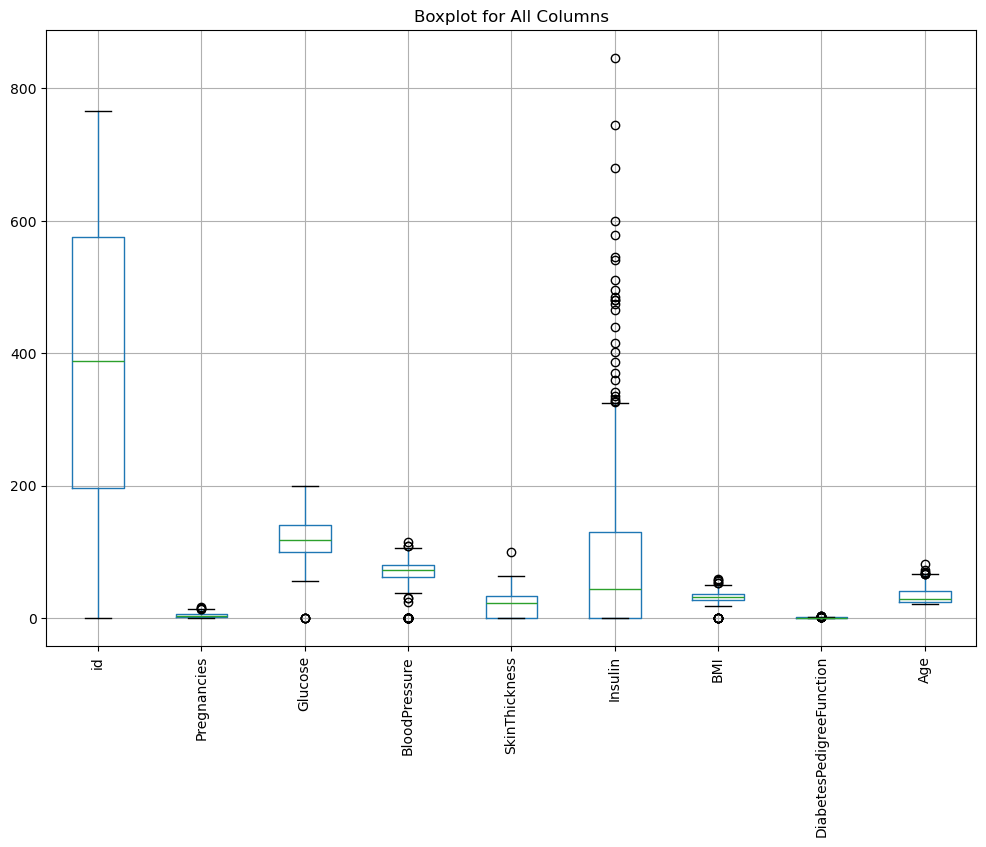

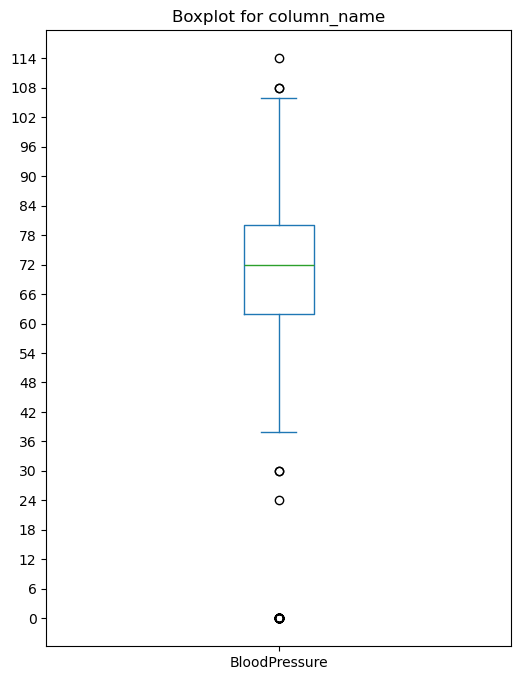

In [105]:
import matplotlib.pyplot as plt

# 데이터프레임의 모든 열에 대해 박스플롯 그리기
plt.figure(figsize=(12, 8))
X_train.boxplot()
plt.title("Boxplot for All Columns")
plt.xticks(rotation=90)  # x축 라벨 회전 (필요 시 조정)
plt.show()

# 특정 열에 대한 박스플롯 그리기
plt.figure(figsize=(6, 8))
X_train['BloodPressure'].plot(kind='box')
plt.title("Boxplot for column_name")

# y축 눈금 조정 (예: 최솟값 ~ 최댓값 구간을 20개로 나눔)
y_min = X_train['BloodPressure'].min()
y_max = X_train['BloodPressure'].max()
plt.yticks(np.linspace(y_min, y_max, 20))

plt.show()

In [106]:
import numpy as np
Q1 = np.quantile(X_train['Insulin'], 0.25)
Q3 = np.quantile(X_train['Insulin'], 0.75)

cond = X_train['Insulin'] > Q3 + 1.5 * (Q3 - Q1)
X_train[X_train['Insulin'] > Q3 + 1.5 * (Q3 - Q1)] = X_train[X_train['Insulin'] <= Q3 + 1.5 * (Q3 - Q1)].median()
X_train[X_train['BloodPressure'] == 0] = X_train[X_train['BloodPressure'] != 0].median()


C:\Users\lsj02\AppData\Local\Temp\ipykernel_24756\3064610791.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[X_train['Insulin'] > Q3 + 1.5 * (Q3 - Q1)] = X_train[X_train['Insulin'] <= Q3 + 1.5 * (Q3 - Q1)].median()
C:\Users\lsj02\AppData\Local\Temp\ipykernel_24756\3064610791.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[X_train['BloodPressure'] == 0] = X_train[X_train['BloodPressure'] != 0].median()


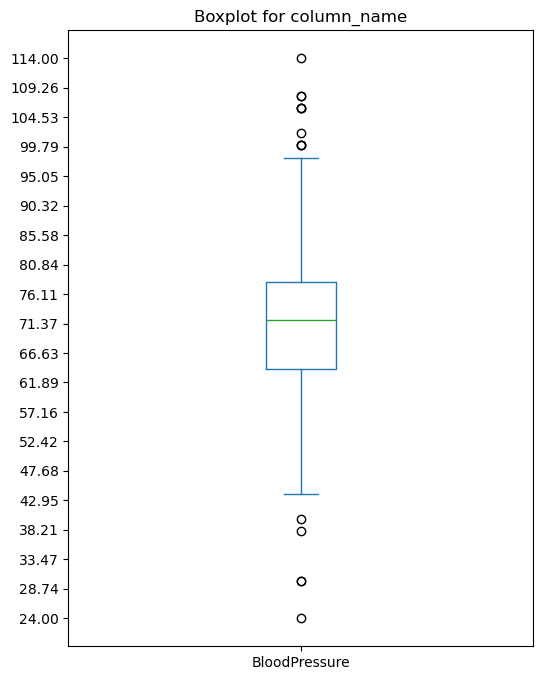

In [107]:
# 특정 열에 대한 박스플롯 그리기
plt.figure(figsize=(6, 8))
X_train['BloodPressure'].plot(kind='box')
plt.title("Boxplot for column_name")

# y축 눈금 조정 (예: 최솟값 ~ 최댓값 구간을 20개로 나눔)
y_min = X_train['BloodPressure'].min()
y_max = X_train['BloodPressure'].max()
plt.yticks(np.linspace(y_min, y_max, 20))

plt.show()

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train['Outcome'])
prediction = rf.predict(X_test)
prediction = pd.DataFrame({'idx':list(X_test.index), 'Outcome':prediction})

rf.score(X_test, y_test['Outcome'])

0.7857142857142857